### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`


In [134]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

np.random.seed(0)
a = np.random.normal(20, 4, 15)
b = np.random.normal(20, 4, 15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [135]:
print('Mean a:', np.mean(a), 'Mean b:', np.mean(b))

Mean a: 22.748033269279322 Mean b: 20.794818308826077


I believe there is no statistically significant difference between the two samples as the means are relatively close and still within the deviation afforded by the parameters given.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

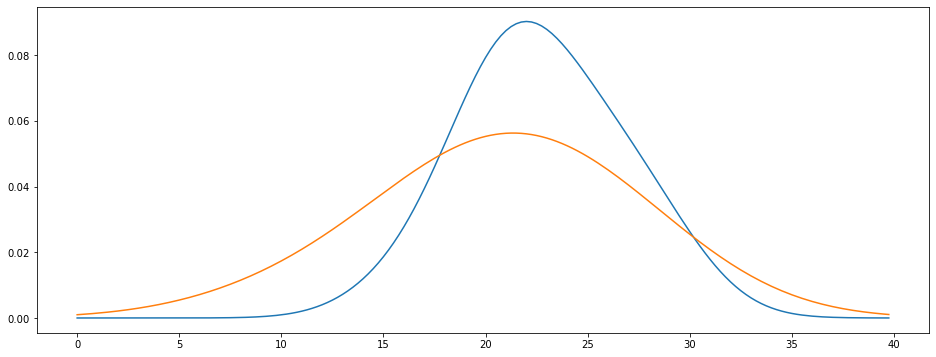

In [136]:
# Write your code here
kde_a = sp.stats.gaussian_kde(a, bw_method=0.8)
kde_b = sp.stats.gaussian_kde(b, bw_method=1)
x_values = np.arange(0, 40, 0.25)
x_densities_a = kde_a.evaluate(x_values)
x_densities_b = kde_b.evaluate(x_values)
plt.figure(figsize=(16,6))
plt.plot(x_values, x_densities_a)
_ = plt.plot(x_values, x_densities_b)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Dataset a does visually differ from dataset b, as one is more concentrated around the $\mu=20$, whereas the other one ends up being a bit shorter height wise, but wider.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [137]:
all_data = np.concatenate([a,b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:20]
    b_subset = all_data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))


sum(means_difference >= (np.mean(a) - np.mean(b))) / len(means_difference)

0.123

The P value is > 0.05 or 5%, so this indicates that there is no statistically significant difference between datasets a and b

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

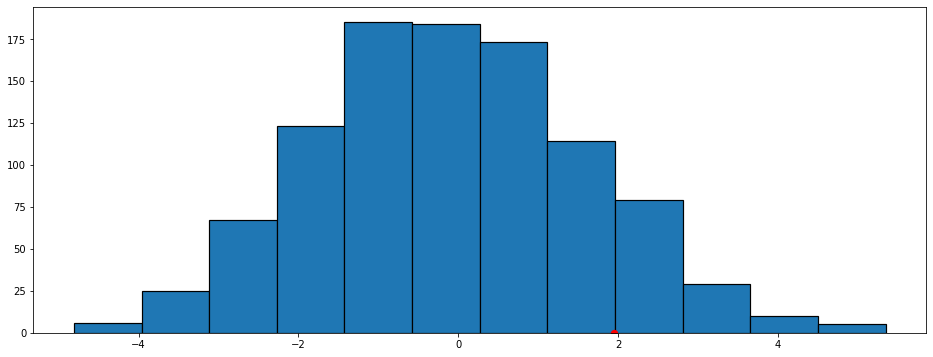

In [138]:
# Write your code here
plt.figure(figsize=(16,6))
plt.scatter(np.mean(a) - np.mean(b), y=0, color = "red", s=40, zorder=2)
_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)